In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes = True)
import matplotlib.pyplot as plt
import nltk
#nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# Exploratory Data Analysis / Feature Engineering 

In [3]:
# read the csv file using pandas
data = pd.read_csv("problem_statement_7.csv")

In [4]:
# Let's see the first five rows of the data using head() function.
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
# let's see the last five rows the data using tail() function.
data.tail()

,Review,Rating
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


In [6]:
# let's see the data dimensions
data.shape 

(20491, 2)

In [7]:
# Let's try to describe the data statistics by using the Describe function.
data.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [8]:
# let's see the data type of every column present in our data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [9]:
# Now, we will check if there are any null values present in the dataset.
# if any of the missing values will be present in dataset, we will remove those values.
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [10]:
# After the null results above, we can conclude that we don't have any missing values in our data.
# So, we don't have to remove any values containing the missing values.
# Now, let's visualise our reviews present in the datset using the bar chart.
# value_counts() function provides us all the reviews present in our dataset with their frequencies.
# Those frequencies can be then ordered ascending and selecting only top 5 out of those.
rating_counts = data['Rating'].value_counts().sort_values(ascending=False).iloc[0:5]

C:\Users\kaurs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


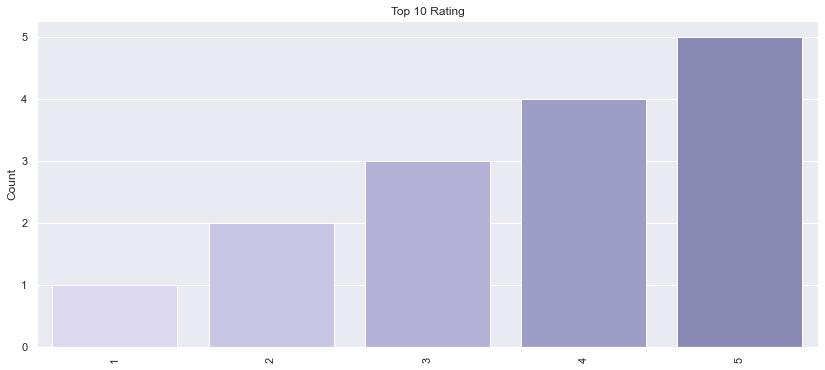

In [11]:
plt.figure(figsize=(14,6))
sns.barplot(rating_counts.index, rating_counts.index, palette=sns.cubehelix_palette(start=2.8, rot=.1,n_colors=10))
plt.ylabel("Count")
plt.title("Top 10 Rating");
plt.xticks(rotation=90);

## Convert all text to Lower Case - Preprocessing

In [12]:
# Converting all the text to lower case.
data['Review'] = data['Review'].str.lower()

## Tokenization - Preprocessing 

In [13]:
# let's iterate through every row in the dataset.
# We have to remove the stopwords from the data as these words need not be included 
# and are useless words which only increase the cost and the valuable processing time.
# Let's first start with the tokenization process..
# the tokenization process is to split the text into the words or sentences.
# we will use NLTK library to achieve this.
# let's just apply this to the first row only and see the output.
print(nltk.word_tokenize(data['Review'][0]))

['nice', 'hotel', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversary', ',', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'reviews', 'did', 'valet', 'parking', ',', 'check', 'quick', 'easy', ',', 'little', 'disappointed', 'non-existent', 'view', 'room', 'room', 'clean', 'nice', 'size', ',', 'bed', 'comfortable', 'woke', 'stiff', 'neck', 'high', 'pillows', ',', 'not', 'soundproof', 'like', 'heard', 'music', 'room', 'night', 'morning', 'loud', 'bangs', 'doors', 'opening', 'closing', 'hear', 'people', 'talking', 'hallway', ',', 'maybe', 'just', 'noisy', 'neighbors', ',', 'aveda', 'bath', 'products', 'nice', ',', 'did', 'not', 'goldfish', 'stay', 'nice', 'touch', 'taken', 'advantage', 'staying', 'longer', ',', 'location', 'great', 'walking', 'distance', 'shopping', ',', 'overall', 'nice', 'experience', 'having', 'pay', '40', 'parking', 'night', ',']


In [14]:
# Now, we will apply word_tokenize() to all the records.
# let's create a function which will take the row as a parameter
# and will tokenize all the words present in it.
# Here we will also strip out non alphanumeric words/characters (such as numbers and punctuation) 
# using .isalpha (you could use .isalnum if you wanted to keep in numbers as well)
def identify_tokens(row):
    review = row['Review']
    tokens = nltk.word_tokenize(review)
    token_words = [word for word in tokens if word.isalpha()]
    return token_words

In [15]:
# Now, we have created a function that will take each row as a parameter
# and will remove all the punctuations(unnecessary) and numbers from the dataset.
# let's iterate over the dataset and pass each row of the data from the function defined above.
data['Review'] = data.apply(identify_tokens, axis = 1)

In [16]:
# Now, that we have applied the created function to remove the punctuations and the numbers from the dataset
# we will again have a look on the first row of the dataset as we did earlier to see the difference.
print(data['Review'][0])

['nice', 'hotel', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversary', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'reviews', 'did', 'valet', 'parking', 'check', 'quick', 'easy', 'little', 'disappointed', 'view', 'room', 'room', 'clean', 'nice', 'size', 'bed', 'comfortable', 'woke', 'stiff', 'neck', 'high', 'pillows', 'not', 'soundproof', 'like', 'heard', 'music', 'room', 'night', 'morning', 'loud', 'bangs', 'doors', 'opening', 'closing', 'hear', 'people', 'talking', 'hallway', 'maybe', 'just', 'noisy', 'neighbors', 'aveda', 'bath', 'products', 'nice', 'did', 'not', 'goldfish', 'stay', 'nice', 'touch', 'taken', 'advantage', 'staying', 'longer', 'location', 'great', 'walking', 'distance', 'shopping', 'overall', 'nice', 'experience', 'having', 'pay', 'parking', 'night']


In [17]:
# As we can see that we have removed the punctuation marks and the numbers from dataset.
# similarly, All other rows would have got the extra marks removed.
# Now, Let's perform stemming.

## Stemming 

In [18]:
# Stemming reduces the related words to the common stem.It is an optional process step.
# Let's perform stemming.
# For example, if we have three words such as 'frightening', 'frighten', 'frightened'
# it reduces all the three words to 'frighten' , 'frighten', 'frighten'.
stemming = PorterStemmer()

In [19]:
# Let's create a function to apply stemming to all the rows of the dataset.
def stem_list(row):
    review_list = row['Review']
    stemmed_list = [stemming.stem(word) for word in review_list]
    return stemmed_list

In [20]:
# Now that we have created the function for stemming..
# we will pass each row of the dataset from this function.
data['Review'] = data.apply(stem_list, axis =1)

In [21]:
# let's observe the first row of the dataset after stemming
print(data['Review'][0])

['nice', 'hotel', 'expens', 'park', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversari', 'arriv', 'late', 'even', 'took', 'advic', 'previou', 'review', 'did', 'valet', 'park', 'check', 'quick', 'easi', 'littl', 'disappoint', 'view', 'room', 'room', 'clean', 'nice', 'size', 'bed', 'comfort', 'woke', 'stiff', 'neck', 'high', 'pillow', 'not', 'soundproof', 'like', 'heard', 'music', 'room', 'night', 'morn', 'loud', 'bang', 'door', 'open', 'close', 'hear', 'peopl', 'talk', 'hallway', 'mayb', 'just', 'noisi', 'neighbor', 'aveda', 'bath', 'product', 'nice', 'did', 'not', 'goldfish', 'stay', 'nice', 'touch', 'taken', 'advantag', 'stay', 'longer', 'locat', 'great', 'walk', 'distanc', 'shop', 'overal', 'nice', 'experi', 'have', 'pay', 'park', 'night']


In [22]:
# Let's remove the stop words from the dataset now.

## Remove Stopwords - Preprocessing 

In [23]:
# let's define the function to remove the stopwords from the dataset.
# the stopwords are some useless words that should be removed because 
# processing of the useless words increase the cost and the valuable processing time.
stops = set(stopwords.words("english"))                  
def remove_stopwords(row):
    stemmed_list = row['Review']
    meaningful_words = [word for word in stemmed_list if not word in stops]
    return meaningful_words

In [24]:
# Here, we will pass all the rows of our dataset from the function created above.
# It would remove all the stop words from the dataset.
# Hence, saving our cost and valuable processing time.
data['Review'] = data.apply(remove_stopwords, axis=1)

In [25]:
# Now that we have removed the stopwords from our dataset.
# we will have a look at the first row to observe the results.
print(data['Review'][0])

['nice', 'hotel', 'expens', 'park', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversari', 'arriv', 'late', 'even', 'took', 'advic', 'previou', 'review', 'valet', 'park', 'check', 'quick', 'easi', 'littl', 'disappoint', 'view', 'room', 'room', 'clean', 'nice', 'size', 'bed', 'comfort', 'woke', 'stiff', 'neck', 'high', 'pillow', 'soundproof', 'like', 'heard', 'music', 'room', 'night', 'morn', 'loud', 'bang', 'door', 'open', 'close', 'hear', 'peopl', 'talk', 'hallway', 'mayb', 'noisi', 'neighbor', 'aveda', 'bath', 'product', 'nice', 'goldfish', 'stay', 'nice', 'touch', 'taken', 'advantag', 'stay', 'longer', 'locat', 'great', 'walk', 'distanc', 'shop', 'overal', 'nice', 'experi', 'pay', 'park', 'night']


In [26]:
# The results above show that the stopwords have been removed from the dataset.

## Rejoin Words - Preprocessing

In [27]:
# let's now define a function that will rejoin all the processed words.
def rejoin_words(row):
    review_list = row['Review']
    joined_list = (" ".join(review_list))
    return joined_list

In [28]:
# Now that we have created the function that will return us the 
# words after joining. We will be getting the preprocessed words.
data['Review'] = data.apply(rejoin_words, axis=1)

In [29]:
# We have rejoined the words, let's observe the first row.
print(data['Review'][0])

nice hotel expens park got good deal stay hotel anniversari arriv late even took advic previou review valet park check quick easi littl disappoint view room room clean nice size bed comfort woke stiff neck high pillow soundproof like heard music room night morn loud bang door open close hear peopl talk hallway mayb noisi neighbor aveda bath product nice goldfish stay nice touch taken advantag stay longer locat great walk distanc shop overal nice experi pay park night


In [30]:
# Now, we can easily read and understand the above text.
# But it is difficult for the computer to understand the sentence.
# As computers, can only understand the numerical value.
# for this reason, we vectorize all text so that computer can understand better.
# TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

## Calculating TF-IDF - Preprocessing 

In [31]:
# Now, we have to reduce the TF-IDF vector to the two dimensions using PCA.
# Tokenize and generate count vectors
word_vec = data['Review'].apply(str.split).apply(pd.value_counts).fillna(0)

# Compute term frequencies
tf = word_vec.divide(np.sum(word_vec, axis=1), axis=0)

# Compute inverse document frequencies
idf = np.log10(len(tf) / word_vec[word_vec > 0].count()) 

# Compute TF-IDF vectors
tfidf = np.multiply(tf, idf.to_frame().T)

In [32]:
print(tfidf)

           nice      park      stay      room     hotel     night      took  \
0      0.026910  0.038243  0.005377  0.002879  0.002279  0.009307  0.012035   
1      0.001898  0.000000  0.000632  0.002031  0.002813  0.003282  0.004245   
2      0.006970  0.000000  0.003095  0.003728  0.001476  0.010044  0.000000   
3      0.010370  0.000000  0.003454  0.000924  0.004391  0.000000  0.000000   
4      0.000000  0.005889  0.001656  0.000887  0.001579  0.000000  0.005560   
...         ...       ...       ...       ...       ...       ...       ...   
20486  0.004295  0.020345  0.004291  0.000766  0.000000  0.000000  0.000000   
20487  0.012148  0.028774  0.000000  0.000000  0.005144  0.000000  0.000000   
20488  0.007331  0.017363  0.000000  0.003921  0.003104  0.000000  0.000000   
20489  0.000000  0.001433  0.001208  0.001941  0.004610  0.002615  0.000000   
20490  0.000000  0.000000  0.003412  0.000913  0.003254  0.008858  0.000000   

           easi      talk     music  ...    unbolt 

In [33]:
# reduce the tf-idf vectors to two dimensions using PCA. 
reduced_data = PCA(n_components=2).fit_transform(tfidf)

In [34]:
# let's see the results after applying the PCA.
print(reduced_data)

[[-0.00605778 -0.01928805]
 [ 0.00419616 -0.01792027]
 [ 0.00311767 -0.01513997]
 ...
 [-0.00437054 -0.01722737]
 [ 0.00374453 -0.01053323]
 [-0.00040104 -0.00687303]]


# K-Means Clustering 

In [35]:
# lets see the data and the reduced data.
data.head()

,Review,Rating
0,nice hotel expens park got good deal stay hote...,4
1,ok noth special charg diamond member hilton de...,2
2,nice room experi hotel monaco seattl good hote...,3
3,uniqu great stay wonder time hotel monaco loca...,5
4,great stay great stay went seahawk game awesom...,5


In [36]:
reduced_data

array([[-0.00605778, -0.01928805],
       [ 0.00419616, -0.01792027],
       [ 0.00311767, -0.01513997],
       ...,
       [-0.00437054, -0.01722737],
       [ 0.00374453, -0.01053323],
       [-0.00040104, -0.00687303]])

In [37]:
kmeans_pca = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_pca.fit(reduced_data)

KMeans(n_clusters=2, random_state=42)

In [38]:
reduced_data.shape

(20491, 2)

In [39]:
#predict the labels of clusters.
label = kmeans_pca.fit_predict(reduced_data)

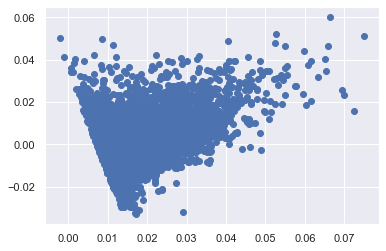

In [40]:
#filter rows of original data
filtered_label0 = reduced_data[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

In [41]:
print(label)

[1 1 1 ... 1 1 1]


In [42]:
u_labels = np.unique(label)

In [43]:
print(u_labels)

[0 1]


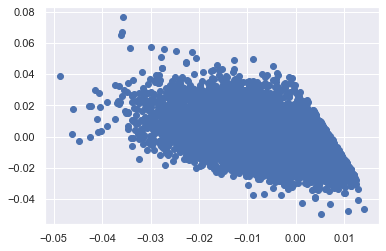

In [44]:
#filter rows of original data
filtered_label0 = reduced_data[label == 1]

#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

## Cluster - 3 

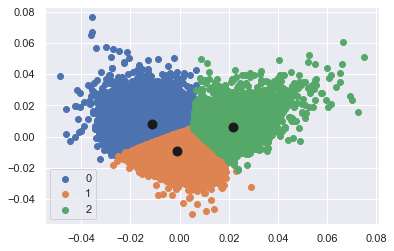

Silhouette Score: 0.401
[0.34699177912863793, 0.42007944276486814, 0.45532891601564857]


In [45]:
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_pca.fit(reduced_data)
#predict the labels of clusters.
label = kmeans_pca.fit_predict(reduced_data)
u_labels = np.unique(label)
silhouette_scores=[]    

# Getting the centroids
centroids = kmeans_pca.cluster_centers_
for i in u_labels:
    plt.scatter(reduced_data[label == i , 0] , reduced_data[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

num_clusters = 3
sample_silhouette_values = silhouette_samples(reduced_data, label)
score_for_3 = silhouette_score(reduced_data, kmeans_pca.labels_, metric='euclidean')
# Print the score
print('Silhouette Score: %.3f' % score_for_3)
silhouette_scores.append(score_for_3)

means_lst = []
for label in range(num_clusters):
    means_lst.append(sample_silhouette_values[kmeans_pca.labels_ == label].mean())
print(means_lst)                                                                             


##  Cluster - 4

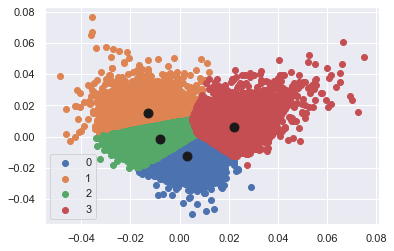

Silhouette Score: 0.359
[0.36076689410555396, 0.27851668247332495, 0.34725605928846376, 0.4435346982369354]


In [46]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_pca.fit(reduced_data)
#predict the labels of clusters.
label = kmeans_pca.fit_predict(reduced_data)
u_labels = np.unique(label)

# Getting the centroids
centroids = kmeans_pca.cluster_centers_
for i in u_labels:
    plt.scatter(reduced_data[label == i , 0] , reduced_data[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

num_clusters = 4
sample_silhouette_values = silhouette_samples(reduced_data, label)
score_for_4 = silhouette_score(reduced_data, kmeans_pca.labels_, metric='euclidean')
# Print the score
print('Silhouette Score: %.3f' % score_for_4)
silhouette_scores.append(score_for_4)
means_lst = []
for label in range(num_clusters):
    means_lst.append(sample_silhouette_values[kmeans_pca.labels_ == label].mean())
print(means_lst)                                                                             


## Cluster - 5 

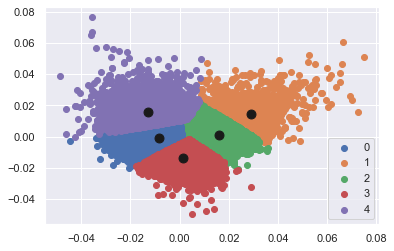

Silhouette Score: 0.344
[0.3523783330467811, 0.29718686528433524, 0.347794953410101, 0.38723904748433335, 0.276680240235676]


In [47]:
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans_pca.fit(reduced_data)
#predict the labels of clusters.
label = kmeans_pca.fit_predict(reduced_data)
u_labels = np.unique(label)

# Getting the centroids
centroids = kmeans_pca.cluster_centers_
for i in u_labels:
    plt.scatter(reduced_data[label == i , 0] , reduced_data[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

num_clusters = 5
sample_silhouette_values = silhouette_samples(reduced_data, label)
score_for_5 = silhouette_score(reduced_data, kmeans_pca.labels_, metric='euclidean')
# Print the score
print('Silhouette Score: %.3f' % score_for_5)
silhouette_scores.append(score_for_5)
means_lst = []
for label in range(num_clusters):
    means_lst.append(sample_silhouette_values[kmeans_pca.labels_ == label].mean())
print(means_lst)                                                                             


## Cluster - 6 

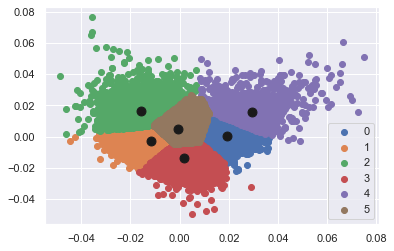

Silhouette Score: 0.347
[0.4363084948121341, 0.34392987958088034, 0.2984055884511756, 0.3827198965637263, 0.2638570751464433, 0.29833963052345747]


In [48]:
kmeans_pca = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
kmeans_pca.fit(reduced_data)
#predict the labels of clusters.
label = kmeans_pca.fit_predict(reduced_data)
u_labels = np.unique(label)

# Getting the centroids
centroids = kmeans_pca.cluster_centers_
for i in u_labels:
    plt.scatter(reduced_data[label == i , 0] , reduced_data[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

num_clusters = 6
sample_silhouette_values = silhouette_samples(reduced_data, label)
score_for_6 = silhouette_score(reduced_data, kmeans_pca.labels_, metric='euclidean')
# Print the score
print('Silhouette Score: %.3f' % score_for_6)
silhouette_scores.append(score_for_6)
means_lst = []
for label in range(num_clusters):
    means_lst.append(sample_silhouette_values[kmeans_pca.labels_ == label].mean())
print(means_lst)                                                                             


## Cluster - 7 

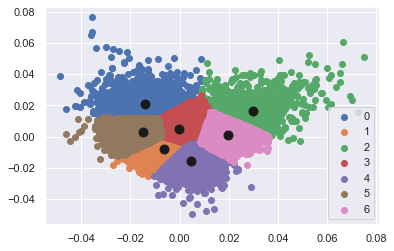

Silhouette Score: 0.337
[0.2762570915510692, 0.3601108383229894, 0.2692734615727235, 0.28281179951769386, 0.33770173643942825, 0.3305263430480535, 0.43269330384775445]


In [49]:
kmeans_pca = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
kmeans_pca.fit(reduced_data)
#predict the labels of clusters.
label = kmeans_pca.fit_predict(reduced_data)
u_labels = np.unique(label)

# Getting the centroids
centroids = kmeans_pca.cluster_centers_
for i in u_labels:
    plt.scatter(reduced_data[label == i , 0] , reduced_data[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

num_clusters = 7
sample_silhouette_values = silhouette_samples(reduced_data, label)
score_for_7 = silhouette_score(reduced_data, kmeans_pca.labels_, metric='euclidean')
# Print the score
print('Silhouette Score: %.3f' % score_for_7)
silhouette_scores.append(score_for_7)
means_lst = []
for label in range(num_clusters):
    means_lst.append(sample_silhouette_values[kmeans_pca.labels_ == label].mean())
print(means_lst)                                                                             


In [50]:
print(silhouette_scores)
num_clusters=[3,4,5,6,7]

[0.4014235121705951, 0.3590241469614781, 0.3436824128726129, 0.3470917579631399, 0.336909405915904]


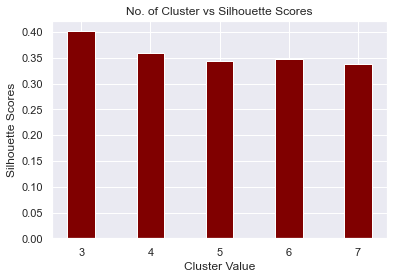

In [51]:
# creating the bar plot
plt.bar(num_clusters, silhouette_scores, color ='maroon',
        width = 0.4)
 
plt.xlabel("Cluster Value")
plt.ylabel("Silhouette Scores")
plt.title("No. of Cluster vs Silhouette Scores")
plt.show()

In [52]:
data.shape

(20491, 2)

#### The value of 4  clusters looks to be the optimal one. The silhouette score for this cluster is above average silhouette scores. Also, the fluctuation in size is similar for the further increasing clusters

In [53]:
# The Apriori library we are going to use requires our dataset to be in the form of a list of lists, 
# where the whole dataset is a big list and each transaction in the dataset is an inner list within the 
# outer big list. 
records = []
for index in data.index:
    records.append(data['Review'][index].split(" "))
len(records)

20491

In [54]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5979 sha256=6ee0e7b00b8b20ec758536cfd80814713fa1bdc0ef5755d6d1bef6fc7dba6877
  Stored in directory: c:\users\kaurs\appdata\local\pip\cache\wheels\1b\02\6c\a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [57]:
from apyori import apriori
association_rules = apriori(records, min_support=0.1, min_confidence=0.2,min_length=2)
association_results = list(association_rules)
print(association_rules)

<generator object apriori at 0x000001DE14C31B30>


In [58]:
for item in association_rules:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")